<a href="https://colab.research.google.com/github/MangoGrove/MangoGrove.github.io/blob/main/Project/NLP_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Modules/Files

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch, pandas as pd
from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr, spearmanr, wilcoxon

In [2]:
import re

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
#connecting to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Book_E = "/content/drive/MyDrive/NLPFolder/Work_Sources/English/Don Quixote.txt"
Book_S = "/content/drive/MyDrive/NLPFolder/Work_Sources/Spanish/Don Quijot.txt"

#Code

* load text

In [6]:
spanish_text = open(Book_S, 'r').read()
english_text = open(Book_E, 'r').read()

In [34]:
print(spanish_text[:-1000])

﻿The Project Gutenberg eBook of Don Quijote
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Don Quijote

Author: Miguel de Cervantes Saavedra

Release date: December 1, 1999 [eBook #2000]
                Most recently updated: January 17, 2021

Language: Spanish

Credits: an anonymous Project Gutenberg volunteer and Joaquin Cuenca Abela


*** START OF THE PROJECT GUTENBERG EBOOK DON QUIJOTE ***




El ingenioso hidalgo don Quijote de la Mancha



por Miguel de Cervantes Saavedra





El ingenioso hidalgo don Quijote de la Mancha


  
Tasa

  
Testimonio de las erratas

  
El Rey

  
Al

* clean up text

In [7]:
def extract_gutenberg_text(text):
# should really learn how to read in function from other notebooks
    start_phrase = "*** START OF THE PROJECT GUTENBERG EBOOK"
    #print(start_phrase)
    end_phrase = "*** END OF THE PROJECT GUTENBERG EBOOK "

    lines = text.splitlines()
    start_idx, end_idx = 0, len(lines)

    # Find the start of the actual book (after the START line)
    for i, line in enumerate(lines):
        if start_phrase in line:
            #print(line)
            start_idx = i + 1  # Start *after* the START line
            break

    for i in range(len(lines) - 1, -1, -1):
        if lines[i].upper().startswith(end_phrase):
            #print(lines[i])
            end_idx = i  # Stop *before* the END line
            break

    # Extract and return just the main content
    return "\n".join(lines[start_idx:end_idx]).strip()

In [8]:
clean_spanish = extract_gutenberg_text(spanish_text)

clean_english = extract_gutenberg_text(english_text)

In [9]:
def split_sent(text):
  sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
  return sentences

In [10]:
def split_paragraph(text):
  paragraphs = re.split(r'\n\n+', text)
  return paragraphs

In [88]:
def split_chapters (text):
  chapters = re.split(r'CHAPTER\s+\d+', text)
  return chapters

def split_capitulos (text):
  chapters = re.split(r'Capítulo\s+\d+', text)
  return chapters


In [90]:
spanish_chapt = split_capitulos(clean_spanish)
print(len(spanish_chapt))
english_chapt = split_chapters(clean_english)

1


* word freqeuncy pickup

In [11]:
#word frequency
def word_freq (novel):
  #print(f"{novel} word frequency")

  wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(novel)
  plt.figure(figsize=(8, 8), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()




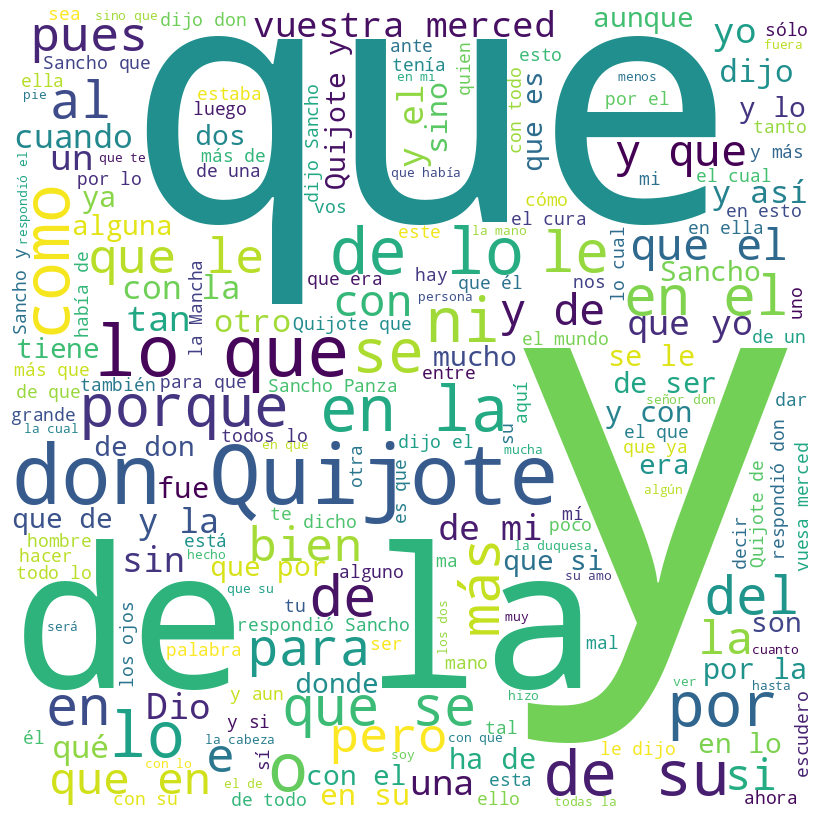

In [13]:
word_freq(clean_spanish)

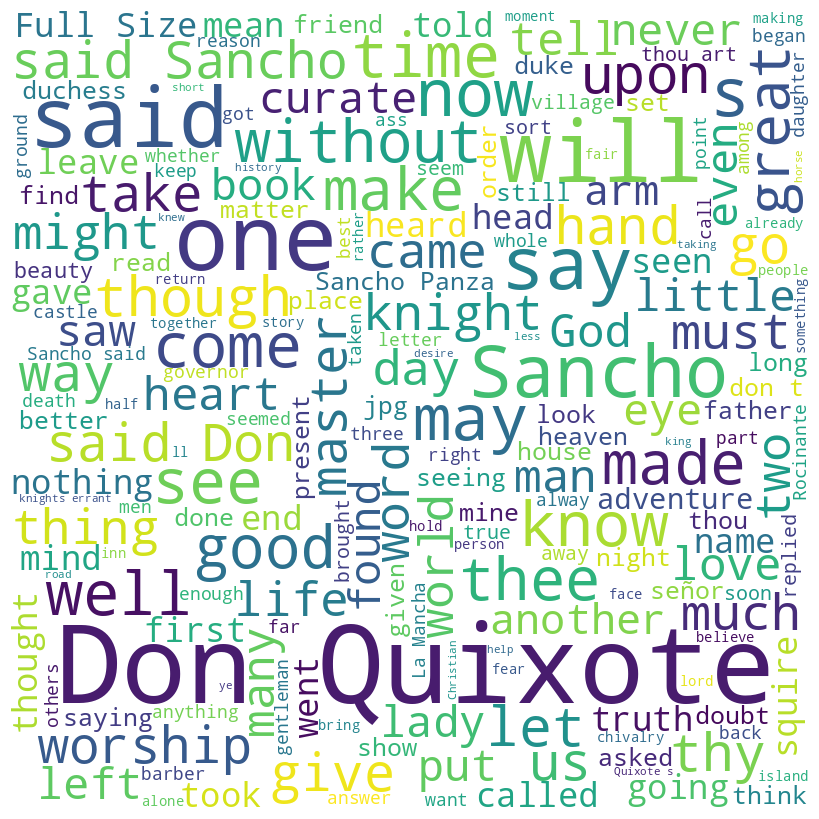

In [14]:
word_freq(clean_english)

* minor sentiment pickup


